In [1]:
#importing the datsets
import pandas as pd
df_train_flight=pd.read_excel("Data_Train.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
df_test_flight=pd.read_excel("Test_set.xlsx",parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
df_train_flight["dataset"]="train"
df_test_flight["dataset"]="test"

In [2]:
#Merging the datasets
df_flight=pd.concat([df_train_flight,df_test_flight],ignore_index=True)
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-30 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897.0,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-30 05:50:00,2021-05-30 13:15:00,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-30 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882.0,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-30 18:05:00,2021-05-30 23:30:00,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-30 16:50:00,2021-05-30 21:35:00,4h 45m,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-05-30 20:30:00,2021-06-07 20:25:00,23h 55m,1 stop,No info,NaN,test
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-05-30 14:20:00,2021-05-30 16:55:00,2h 35m,non-stop,No info,NaN,test
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-05-30 21:50:00,2021-03-07 04:25:00,6h 35m,1 stop,No info,NaN,test
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-05-30 04:00:00,2021-05-30 19:15:00,15h 15m,1 stop,No info,NaN,test


In [3]:
#Lets chcek the null values in the dataset
df_flight.isnull().sum()
#There are no null values only Price has 2671 null values which are part of test dataset so no need to worry

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dataset               0
dtype: int64

In [4]:
#Lets chcek the datatypes of the columns
df_flight.dtypes
#Below "Duration" is of object datatype which we will convert into hours as float dataype

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
dataset                    object
dtype: object

In [5]:
x=(df_flight["Arrival_Time"]-df_flight["Dep_Time"])
duration_list=list()
for i in range(len(x)):
    dur=x.iloc[i].seconds/3600
    duration_list.append(dur)
df_flight["Duration"]=duration_list

In [6]:
#Lets again chcek the data
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,dataset
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-05-30 22:20:00,2021-03-22 01:10:00,2.833333,non-stop,No info,3897.0,train
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-30 05:50:00,2021-05-30 13:15:00,7.416667,2 stops,No info,7662.0,train
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-30 09:25:00,2021-06-10 04:25:00,19.000000,2 stops,No info,13882.0,train
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-30 18:05:00,2021-05-30 23:30:00,5.416667,1 stop,No info,6218.0,train
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-05-30 16:50:00,2021-05-30 21:35:00,4.750000,1 stop,No info,13302.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-05-30 20:30:00,2021-06-07 20:25:00,23.916667,1 stop,No info,NaN,test
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-05-30 14:20:00,2021-05-30 16:55:00,2.583333,non-stop,No info,NaN,test
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-05-30 21:50:00,2021-03-07 04:25:00,6.583333,1 stop,No info,NaN,test
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-05-30 04:00:00,2021-05-30 19:15:00,15.250000,1 stop,No info,NaN,test


In [7]:
#Lets again chcek the datatype
df_flight.dtypes
#Since we have Date of journey,dep_time and duration we can drop "Arrival_Time"  right away

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                  float64
Total_Stops                object
Additional_Info            object
Price                     float64
dataset                    object
dtype: object

In [8]:
df_flight.drop(columns=["Arrival_Time"],inplace=True)

In [9]:
#Lets chcek the value counts of each column of object datatype
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ..

In [10]:
df_flight.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Duration                  float64
Total_Stops                object
Additional_Info            object
Price                     float64
dataset                    object
dtype: object

In [13]:

#For airlines we can combine the last few to their main tag as they are vey less in counts

df_flight["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
df_flight["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df_flight["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [14]:
#In Destination column "New Delhi" can be replaced by "Delhi"
df_flight["Destination"].replace("New Delhi","Delhi",inplace=True)

In [15]:
#Lets again chcek the value counts
for col in df_flight.columns:
    if df_flight[col].dtype=="object":
        print(df_flight[col].value_counts())
        print()

Jet Airways          4754
IndiGo               2564
Air India            2192
Multiple carriers    1559
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Trujet                  1
Name: Airline, dtype: int64

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

Cochin       5682
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → DED → DEL → HYD             1
BLR → HBX → BOM → NAG → DEL       1
BOM → BLR → CCU → BBI → HYD       1
CCU → IXZ → MAA → BLR             1
CCU → IXB → DEL → BLR             1
Name: Route, Length: 132, dtype: int64

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       

In [16]:
#need to exract features from dep_time
import numpy as np
df_flight["time_of_day"]=np.where((df_flight["Dep_Time"].dt.hour>=0)&(df_flight["Dep_Time"].dt.hour<=2),"Late Night",np.where((df_flight["Dep_Time"].dt.hour>=3)&(df_flight["Dep_Time"].dt.hour<=7),"Early Morning",np.where((df_flight["Dep_Time"].dt.hour>=8)&(df_flight["Dep_Time"].dt.hour<=11),"Morning",np.where((df_flight["Dep_Time"].dt.hour>=12)&(df_flight["Dep_Time"].dt.hour<=16),"Afternoon",np.where((df_flight["Dep_Time"].dt.hour>=17)&(df_flight["Dep_Time"].dt.hour<=19),"Evening","Night")))))

In [17]:
#lets again see the data
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,dataset,time_of_day
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2021-05-30 22:20:00,2.833333,non-stop,No Info,3897.0,train,Night
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-05-30 05:50:00,7.416667,2 stops,No Info,7662.0,train,Early Morning
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-05-30 09:25:00,19.000000,2 stops,No Info,13882.0,train,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-05-30 18:05:00,5.416667,1 stop,No Info,6218.0,train,Evening
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,2021-05-30 16:50:00,4.750000,1 stop,No Info,13302.0,train,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,2021-05-30 20:30:00,23.916667,1 stop,No Info,NaN,test,Night
13350,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,2021-05-30 14:20:00,2.583333,non-stop,No Info,NaN,test,Afternoon
13351,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-05-30 21:50:00,6.583333,1 stop,No Info,NaN,test,Night
13352,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,2021-05-30 04:00:00,15.250000,1 stop,No Info,NaN,test,Early Morning


In [18]:
#Some of the columns we can drop like "Date_of_Journey","Route"
df_flight.drop(columns=["Date_of_Journey","Route"],inplace=True)

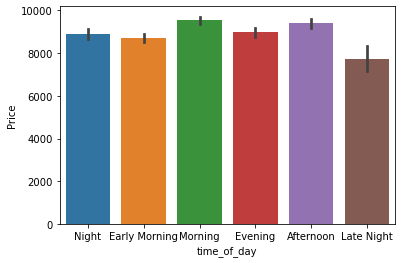

In [48]:
#Lets chcek when the averge price of the flights during entire day
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="time_of_day",y="Price",data=df_flight)
plt.show()

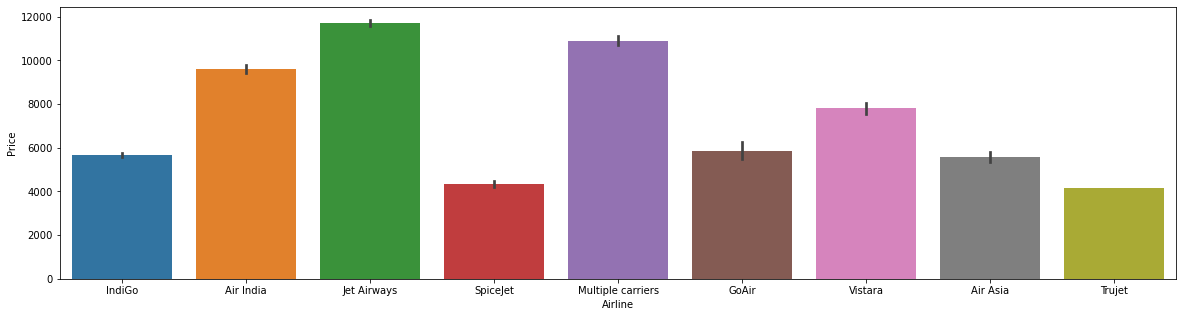

In [20]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(20,5))
sns.barplot(x="Airline",y="Price",data=df_flight)
plt.show()

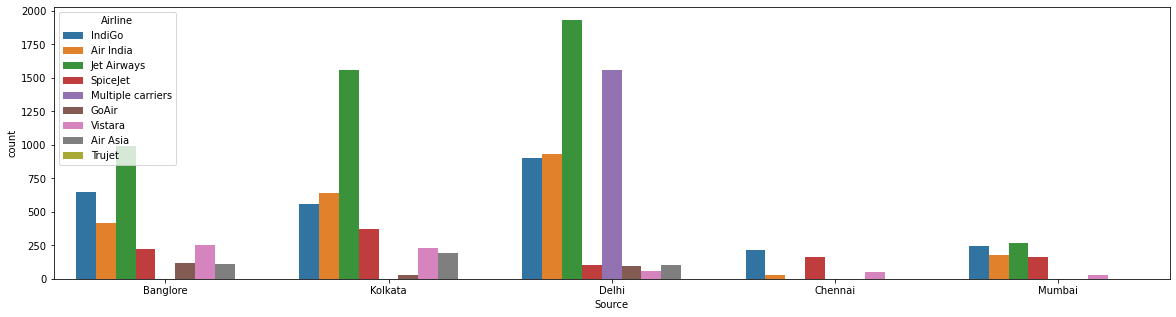

In [21]:
#Lets chcek the most popular flight region wise
plt.figure(figsize=(20,5))
sns.countplot(x="Source",hue="Airline",data=df_flight)
plt.show()

In [22]:
#this is the mean of whole df_flight which includes train and test
df_flight.loc[df_flight["Airline"]=="IndiGo",["Price"]].mean()

Price    5673.682903
dtype: float64

In [23]:
#this is the mean of only train part of df_flight
df_flight.loc[(df_flight["Airline"]=="IndiGo")&(df_flight["dataset"]=="train"),["Price"]].mean()

Price    5673.682903
dtype: float64

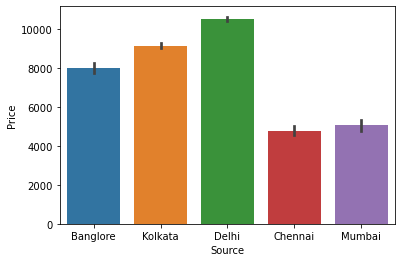

In [24]:
#Lets chcek from which region averge price of the flight was more
sns.barplot(x="Source",y="Price",data=df_flight)
plt.show()

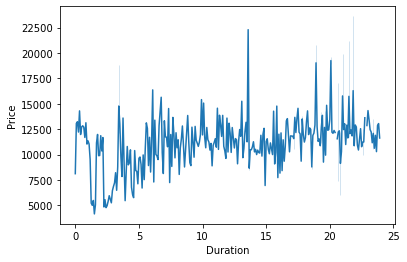

In [25]:
#lets draw a line plot between duration and price
sns.lineplot(x="Duration",y="Price",data=df_flight)
plt.show()
#this picture does not give clear idea about the correlation

In [26]:
#lets chcek the correlation matrix
df_flight.corr()
#so there positive correlation of 0.45 between price and duration

,Duration,Price
Duration,1.000000,0.450205
Price,0.450205,1.000000


In [27]:
#lets delete the Dep_Time column from the dataset
df_flight.drop(columns=["Dep_Time"],inplace=True)

In [28]:
df_flight.dtypes

Airline             object
Source              object
Destination         object
Duration           float64
Total_Stops         object
Additional_Info     object
Price              float64
dataset             object
time_of_day         object
dtype: object

In [29]:
#lets use one hot encodig to covert object datatypes to integers
df_flight_final=pd.get_dummies(df_flight,columns=["Additional_Info","Airline","Destination","Source","Total_Stops","time_of_day"],drop_first=True)

In [30]:
#Lets chcek display the data genrated after one hot encoding
df_flight_final

,Duration,Price,dataset,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_Long layover,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,...,Source_Mumbai,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2.833333,3897.0,train,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,7.416667,7662.0,train,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,19.000000,13882.0,train,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,5.416667,6218.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4.750000,13302.0,train,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,23.916667,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13350,2.583333,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13351,6.583333,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13352,15.250000,NaN,test,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
#Lets seprate the train and test from df_flight_final
df_train=df_flight_final.loc[df_flight_final["dataset"]=="train"]
df_test=df_flight_final.loc[df_flight_final["dataset"]=="test"]

In [32]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [33]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["Price","dataset"],inplace=True)
df_train.drop(columns=["dataset"],inplace=True)

/Users/ankitraj1/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
#lets divide the df_train into iput an doutput
df_x=df_train.drop(columns=["Price"])
y=df_train[["Price"]]

In [35]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)

In [36]:
#Lets use PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=29)
x_pca=pca.fit_transform(x)
print("vraiance :{}".format(np.sum(pca.explained_variance_ratio_)))

vraiance :0.9999999999999998


In [37]:
#to find random stat which gives maximum r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [38]:
#lets make a function which evaluates the model using cross_val_score
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x_pca,y)

r2 score corresponding to  42  is  0.5925721709670644
r2 score corresponding to  43  is  0.6455491275268501
r2 score corresponding to  44  is  0.6017519310834799
r2 score corresponding to  45  is  0.6490064699189729
r2 score corresponding to  46  is  0.65016235258726
r2 score corresponding to  47  is  0.6776062739253201
r2 score corresponding to  48  is  0.7094138896431063
r2 score corresponding to  49  is  0.6564200434570967
r2 score corresponding to  50  is  0.6491046475798052
r2 score corresponding to  51  is  0.6959119030722222
r2 score corresponding to  52  is  0.6507623855315636
r2 score corresponding to  53  is  0.5842550245662503
r2 score corresponding to  54  is  0.5600527261597719
r2 score corresponding to  55  is  0.6340365225210776
r2 score corresponding to  56  is  0.5558765793143463
r2 score corresponding to  57  is  0.6320572323466258
r2 score corresponding to  58  is  0.6741533442450796
r2 score corresponding to  59  is  0.6463698029717067
r2 score corresponding to  60 

In [40]:
#Lets chcek the cross_val_score for decision trees
print("Decision Tree Regressor\n\n")
model_evaluation(dtr,x_pca,y)

Decision Tree Regressor


Mean r2 score for regressor:  0.6606552920710597
standard deviation in r2 score for regressor:  0.01277337948882999
[0.65962739 0.63865025 0.65835253 0.67478362 0.67186267]


In [41]:
#Lets chcek random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(x_pca,y)
clf.best_params_

{'n_estimators': 500}

In [42]:
#lets chcek Random forest using n_estimators=500 
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
#Lets chcek the cross_val_score for Random Forest Regressor
print("Random Forest Regressor\n\n")
model_evaluation(rfr,x_pca,y)

Random Forest Regressor


Mean r2 score for regressor:  0.7127538041919397
standard deviation in r2 score for regressor:  0.012016297495240398
[0.69669071 0.70178469 0.71374009 0.72446442 0.72708912]


In [43]:
#Lets chcek KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(x_pca, y)
clf.best_params_

{'n_neighbors': 5}

In [44]:
knr=KNeighborsRegressor(n_neighbors=5)
maxr2_score(knr,x_pca,y)

r2 score corresponding to  42  is  0.7063016817491145
r2 score corresponding to  43  is  0.7027932534270408
r2 score corresponding to  44  is  0.7121882817686815
r2 score corresponding to  45  is  0.6851202893571988
r2 score corresponding to  46  is  0.7051584163403211
r2 score corresponding to  47  is  0.7212767968163096
r2 score corresponding to  48  is  0.6957650381025755
r2 score corresponding to  49  is  0.6850941521391647
r2 score corresponding to  50  is  0.6961725605542258
r2 score corresponding to  51  is  0.7293802784521355
r2 score corresponding to  52  is  0.7257534578253031
r2 score corresponding to  53  is  0.6464317731484137
r2 score corresponding to  54  is  0.710179325503048
r2 score corresponding to  55  is  0.6787367735971368
r2 score corresponding to  56  is  0.6629426849065143
r2 score corresponding to  57  is  0.6940503707000936
r2 score corresponding to  58  is  0.6973584561473611
r2 score corresponding to  59  is  0.7000083492330034
r2 score corresponding to  60

77

In [45]:
#Lets check the cross_val score of KKN regressor
print("KNN Regressor\n\n")
model_evaluation(knr,x_pca,y)

KNN Regressor


Mean r2 score for regressor:  0.7102312864225786
standard deviation in r2 score for regressor:  0.01452285329894088
[0.70087806 0.71483745 0.69231168 0.7351268  0.70800244]


In [49]:
#random forest and KNN are peforming almost equally good,but KNN is faster so we will choose KNN as our Final model
#knr is model
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,random_state = 77,test_size=0.20)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [50]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2173.671922786022
r2_score is:  0.7537296160584182


In [51]:
#lets transform df_test accoring to pca
x_pca_test=pca.transform(df_test)

In [52]:
price_pred=knr.predict(x_pca_test)

In [53]:
#lets make the dataframe for price_pred
price_pred=pd.DataFrame(price_pred,columns=["Price"])

In [54]:
#Lets save the submission to csv
price_pred.to_csv("Flight_Price_Predictions.csv",index=False)